# Homework 2 - tables and plots

In order to work with tables and plots in python, I need to import necessary modules

In [167]:
#Import modules for working with dataframes and visualisation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Part 1 - Apartment prices

Fetch data from file which can be found in the github repository for the course.
Select the file Booli_sold.csv and press raw to download the data.
Use the url to read the data from csv format into dataframe in python.

View how the data looks like in a table to get an overview of the data.

In [170]:
#Read from file and store in a dataframe table
df= pd.read_csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/Booli_sold.csv")

# View five rows of table
df.head()



,listPrice,rent,livingArea,rooms,published,constructionYear,objectType,booliId,soldDate,soldPrice,...,location.position.latitude,location.position.longitude,location.position.isApproximate,location.region.municipalityName,location.region.countyName,location.distance.ocean,source.name,source.id,source.type,source.url
0,3995000,4467.0,73.0,3.0,2018-10-15 13:33:18,1935.0,Lägenhet,3263989,2018-11-08,3820000,...,59.371033,18.054057,NaN,Stockholm,Stockholms län,260,MOHV,1901865,Broker,http://www.mohv.se/
1,1995000,1773.0,36.0,1.0,2018-10-05 14:29:28,1968.0,Lägenhet,3256231,2018-10-19,2355000,...,59.371242,18.057821,NaN,Stockholm,Stockholms län,218,Notar,1566,Broker,http://www.notar.se/
2,5100000,3839.0,81.0,3.0,2018-09-11 13:44:43,1936.0,Lägenhet,3236660,2018-09-27,6110000,...,59.371617,18.054716,NaN,Stockholm,Stockholms län,186,Historiska Hem AB,65645750,Broker,http://historiskahem.se/
3,5495000,4483.0,107.0,4.0,2018-08-25 02:56:56,1936.0,Lägenhet,3224374,2018-09-06,8050000,...,59.371480,18.053880,NaN,Stockholm,Stockholms län,218,Notar,1566,Broker,http://www.notar.se/
4,1995000,1696.0,29.0,1.0,2018-06-15 17:16:19,1936.0,Lägenhet,3185496,2018-06-18,2400000,...,59.372160,18.053542,True,Stockholm,Stockholms län,166,Mäklarhuset,204,Broker,http://www.maklarhuset.se/


Not all columns are shown since too many variables (columns).
It is useful to get a list of all variable names which helps me to select relevant data later on.

In [6]:
#Check variable names
print("\n".join(df.columns)) 



listPrice
rent
livingArea
rooms
published
constructionYear
objectType
booliId
soldDate
soldPrice
soldPriceSource
url
floor
additionalArea
apartmentNumber
plotArea
location.address.streetAddress
location.position.latitude
location.position.longitude
location.position.isApproximate
location.region.municipalityName
location.region.countyName
location.distance.ocean
source.name
source.id
source.type
source.url


#### 1.  Calculate the price per square meter for each apartment sold

 Calculate the selling price per quare meter (ppSqm) by using the existing data, soldPrice and livingArea,
 derived by the formula   ppSqm = soldPrice / livingArea 
 
 Create a new column ppSqm to store the derived data. Select variables of interest to be presented in the table.

In [175]:
# Mutate - add new column ppSqm for price per square meter
df.loc[:, 'ppSqm'] = (df['soldPrice'] / df['livingArea']).round()

#Subset of dataframe - select variables of interest
selected_df = df[['booliId', 'listPrice', 'rent', 'livingArea', 'soldPrice', 'floor',\
                  'location.address.streetAddress', 'ppSqm', 'source.name']]

# Preview of table
selected_df.head()



,booliId,listPrice,rent,livingArea,soldPrice,floor,location.address.streetAddress,ppSqm,source.name
0,3263989,3995000,4467.0,73.0,3820000,NaN,Åminnevägen 19,52329.0,MOHV
1,3256231,1995000,1773.0,36.0,2355000,1.0,Docentbacken 9,65417.0,Notar
2,3236660,5100000,3839.0,81.0,6110000,3.0,Ekhagsvägen 5,75432.0,Historiska Hem AB
3,3224374,5495000,4483.0,107.0,8050000,3.0,Torphagsvägen 4,75234.0,Notar
4,3185496,1995000,1696.0,29.0,2400000,3.0,Torphagsvägen 14,82759.0,Mäklarhuset


#### 2.  Rank the top 5 most expensive apartments with respect to ppSqm

Use selected data to sorting it in descending order with respect to ppSqm

In [178]:
# sorting the selected subset of dataframe
sorted_df = selected_df.sort_values('ppSqm', ascending=False).head(5)

sorted_df


,booliId,listPrice,rent,livingArea,soldPrice,floor,location.address.streetAddress,ppSqm,source.name
67,2018259,1595000,1464.0,24.0,2500000,3.0,Ekhagsvägen 8,104167.0,Notar
50,2125576,1890000,1464.0,24.0,2450000,3.0,Ekhagsvägen 8,102083.0,HusmanHagberg
54,2078171,1795000,1374.0,23.0,2300000,1.0,Ekhagsvägen 10,100000.0,Notar
34,2330886,1750000,1144.0,25.0,2210000,0.0,Torphagsvägen 4,88400.0,HusmanHagberg
55,2067384,1895000,1522.0,26.9,2300000,2.0,Docentbacken 1B,85502.0,Notar


#### 3.  What is the average ppSqm in Ekhagen?

I need to filter the selected data so I only obtain data entries
where the location address contains the name 'Ekhag'. 
Calculate then the mean value of the ppSqm data.

In [181]:
#Filtering for apartments in Ekhagen
filtered_df = selected_df[df['location.address.streetAddress'].str.contains('Ekhag', na=False)]

print(f"Average price per square meter in Ekhagen: {filtered_df['ppSqm'].mean().round()}")



Average price per square meter in Ekhagen: 60636.0


#### 4. Highlight an aspect of the data you find interesting

The number of rooms in an appartment that a buyer needs often indcates that the buyer is a single houshold,
a couple or a family with members larger than 2. 

So plotting a histogram showing the frequency of "room-number" might tell us the size of the houshold.

The histogram below shows that apartments with 2 rooms are the most commonly sold.


(array([27., 72., 29., 23.,  4.,  2.]),
 array([1., 2., 3., 4., 5., 6., 7.]),
 <BarContainer object of 6 artists>)

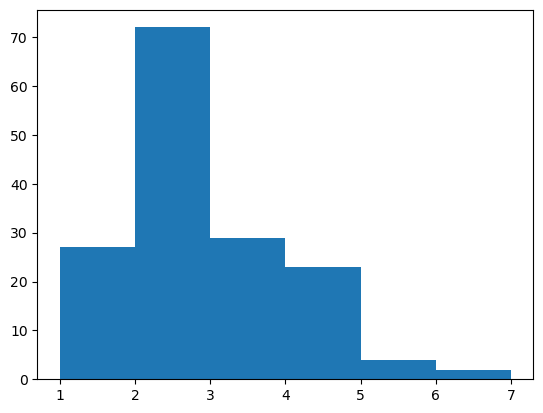

In [20]:
plt.hist(df['rooms'], bins=range(1,8))


### Part 2 - The Swedish election of 2018

In [184]:
# Read the data from file
df_election = pd.read_csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/2018_R_per_kommun.csv", sep=";", decimal=',')

#preview data
df_election.head()


,LÄNSKOD,KOMMUNKOD,LÄNSNAMN,KOMMUNNAMN,M,C,L,KD,S,V,...,TRP,VL-S,ÖVR,OGEJ,BLANK,OG,RÖSTER GILTIGA,RÖSTANDE,RÖSTBERÄTTIGADE,VALDELTAGANDE
0,1,14,Stockholms län,Upplands Väsby,23.11,6.26,5.66,6.71,26.97,8.01,...,NaN,NaN,NaN,0.04,0.69,0.06,25830,26036,30740,84.70
1,1,15,Stockholms län,Vallentuna,28.29,10.11,7.73,7.58,18.91,4.47,...,0.0,NaN,0.00,0.02,0.59,0.08,20952,21099,23438,90.02
2,1,17,Stockholms län,Österåker,29.68,9.35,7.48,7.13,19.71,4.97,...,NaN,NaN,0.01,0.03,0.69,0.13,27711,27947,31309,89.26
3,1,20,Stockholms län,Värmdö,27.49,9.76,6.40,5.89,20.48,6.02,...,NaN,NaN,0.01,0.04,0.67,0.07,28115,28335,31371,90.32
4,1,23,Stockholms län,Järfälla,23.96,6.31,6.04,6.29,27.68,8.75,...,0.0,NaN,0.02,0.04,0.53,0.07,45654,45948,53230,86.32


#### 1.  Calculate the total number of legitimate votes in Stockholm during the election
Make sure to filter data with observation data for stockholm only.
Select a subset of the filtered data for two relevant variables.
Group the stockholm data and calculate the number of legitimate votes. 

In [186]:
#Filter data only from stockholm
df_election_sthlm = df_election[ df_election['LÄNSNAMN'] == 'Stockholms län']

#Select specific data of interest from stockholm
df_leg_votes_sthlm = df_election_sthlm[['LÄNSNAMN', 'RÖSTER GILTIGA']]

#Aggregate the legitimate votes in stockholm
df_leg_votes_sthlm.groupby("LÄNSNAMN").sum()



,RÖSTER GILTIGA
LÄNSNAMN,
Stockholms län,1426237


#### 2.  In which municipality did the social democratic party, garner the hightest voting percentage?

Find the entry in the data of stockholm where the value of column variable S is maximum.
Use the index for this entry to present the municipality and the highest voting.

In [189]:
#Find the entry that gives max value for S in stockholm
row_id = df_election_sthlm['S'].idxmax()

#view specific data for that entry 
df_election_sthlm.loc[[row_id]] [['KOMMUNNAMN','S']]



,KOMMUNNAMN,S
7,Botkyrka,32.34


#### 3.  Rank the (3) municipialities with highest participation

Sorting the stockholm data with respect to variable VALDELTAGANDE in descending order and present the top head of the data for the municipality and participation.

In [193]:
#Sorting with respect to election participation
sorted_participation_df = df_election_sthlm.sort_values('VALDELTAGANDE', ascending=False)

#View data 
sorted_participation_df[['KOMMUNNAMN', 'VALDELTAGANDE']].head(3)



,KOMMUNNAMN,VALDELTAGANDE
22,Vaxholm,92.74
5,Ekerö,92.16
14,Danderyd,91.92


### Part 3 - Predicting strokes


In [195]:
#Read data
df_health = pd.read_csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/stroke-data.csv")

#View data
df_health.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Check the distribution of age in data to make sure it is relatively balanced.

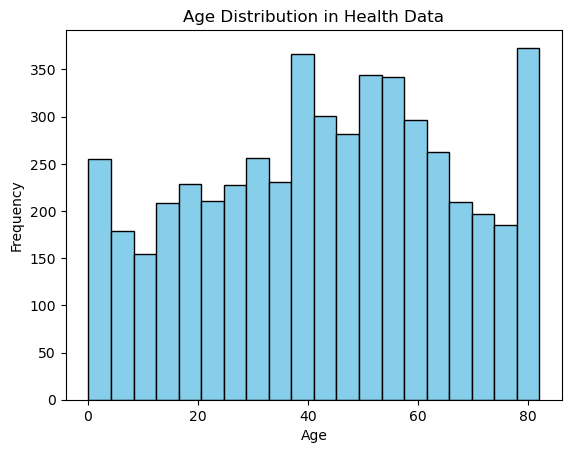

In [198]:
plt.hist(df_health['age'], bins=20, color='skyblue', edgecolor='black')

# Specify title and axes
plt.title("Age Distribution in Health Data") 
plt.xlabel("Age") 
plt.ylabel("Frequency")

# show diagram
plt.show()



 Since age distribution is fairly balanced, I will examine the risk of stroke with respect to age.

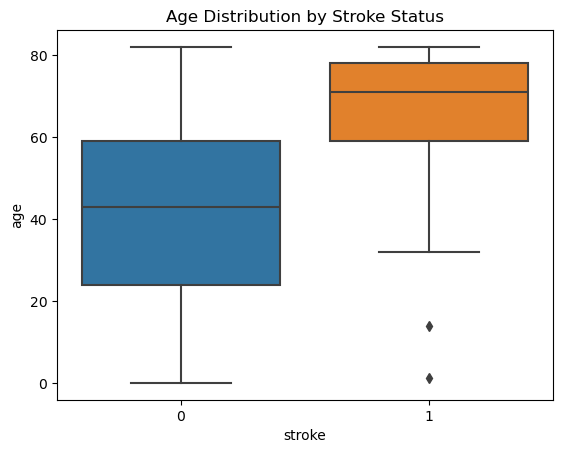

In [200]:

sns.boxplot(data=df_health, x='stroke', y='age')
plt.title("Age Distribution by Stroke Status")
plt.show()


The diagram shows that the risk of stroke is more common among older people.
It is also interesting to check if heart disease increases the risk of stroke.

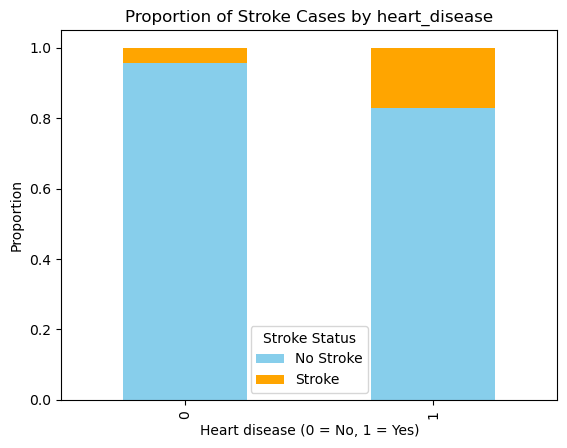

In [204]:
#Group data to get the proportional distribution of stroke status for those with heart disease 
stroke_counts = df_health.groupby('heart_disease')['stroke'].value_counts(normalize=True).unstack()

# Plot a bar diagram
stroke_counts.plot(kind='bar', stacked=True, color=['skyblue', 'orange'])
plt.title("Proportion of Stroke Cases by heart_disease")
plt.xlabel("Heart disease (0 = No, 1 = Yes)")
plt.ylabel("Proportion")
plt.legend(["No Stroke", "Stroke"], title="Stroke Status")
plt.show()

There is a larger proportion of people with heart disease that suffered a stroke compared 
to those with no heart disease.